PHASE 1 PROJECT
1. Problem statement
   A company is preparing to step into the aviation industry with plans to purchase and operate airplanes for both commercial and private use. While this is an exciting opportunity, the leadership team doesn’t yet have the expertise needed to fully understand the risks tied to aviation accidents and long-term safety trends.

   To make smart purchasing choices, the company needs a clear, data-driven view of which aircraft types carry the lowest operational risks. By examining decades of aviation accident data, we can uncover valuable insights into how different aircraft have performed in terms of safety, the severity of accidents, and the factors that contribute to them. These insights will give the aviation division a strong foundation to make confident, evidence-based investment decisions—helping reduce both financial risk and safety concerns as the company enters this new market.

2. Main Objective
   To determine which aircraft types present the highest risk profile for the company’s new aviation business by analyzing historical accident and safety data.

3. Sub-objectives
   a. Examine accident frequency over time to identify safety improvements and high-risk periods
   b. Compare fatal vs non-fatal accident trends to understand how survivability has changed.
   c. Analyze accidents by aircraft category to identify which types are riskiest
   d. Assess accident severity by engine type to determine which propulsion systems are most reliable
   e. Identify the most accident-prone aircraft models to highlight high-risk vs low-risk aircraft.
   

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the dataset
df = pd.read_csv("Aviation_Data.csv")


df.info()

c:\Users\Ryan\Downloads\anaconda4\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [4]:
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [5]:
df.isna().sum()

Event.Id                   1459
Investigation.Type            0
Accident.Number            1459
Event.Date                 1459
Location                   1511
Country                    1685
Latitude                  55966
Longitude                 55975
Airport.Code              40099
Airport.Name              37558
Injury.Severity            2459
Aircraft.damage            4653
Aircraft.Category         58061
Registration.Number        2776
Make                       1522
Model                      1551
Amateur.Built              1561
Number.of.Engines          7543
Engine.Type                8536
FAR.Description           58325
Schedule                  77766
Purpose.of.flight          7651
Air.carrier               73700
Total.Fatal.Injuries      12860
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Uninjured            7371
Weather.Condition          5951
Broad.phase.of.flight     28624
Report.Status              7840
Publication.Date          16689
dtype: i

In [ ]:
# I want to deal with these specific columns for my dataset
relevant_columns = [
    "Event.Date", "Make", "Model", "Aircraft.Category", 
    "Number.of.Engines", "Engine.Type",
    "Total.Fatal.Injuries", "Total.Serious.Injuries", "Total.Minor.Injuries",
    "Location"
]

df = df[relevant_columns]

In [7]:
df.head()

,Event.Date,Make,Model,Aircraft.Category,Number.of.Engines,Engine.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Location
0,1948-10-24,Stinson,108-3,NaN,1.0,Reciprocating,2.0,0.0,0.0,"MOOSE CREEK, ID"
1,1962-07-19,Piper,PA24-180,NaN,1.0,Reciprocating,4.0,0.0,0.0,"BRIDGEPORT, CA"
2,1974-08-30,Cessna,172M,NaN,1.0,Reciprocating,3.0,NaN,NaN,"Saltville, VA"
3,1977-06-19,Rockwell,112,NaN,1.0,Reciprocating,2.0,0.0,0.0,"EUREKA, CA"
4,1979-08-02,Cessna,501,NaN,NaN,NaN,1.0,2.0,NaN,"Canton, OH"


In [ ]:
#Dates are fixed and turned into usable time-series features.
df["Event.Date"] = pd.to_datetime(df["Event.Date"], errors="coerce")
df["Event.Year"] = df["Event.Date"].dt.year
df["Event.Month"] = df["Event.Date"].dt.month

df = df.dropna(subset=["Event.Year"])

In [11]:
df.head(10)

,Event.Date,Make,Model,Aircraft.Category,Number.of.Engines,Engine.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Location,Event.Year,Event.Month
0,1948-10-24,Stinson,108-3,NaN,1.0,Reciprocating,2.0,0.0,0.0,"MOOSE CREEK, ID",1948.0,10.0
1,1962-07-19,Piper,PA24-180,NaN,1.0,Reciprocating,4.0,0.0,0.0,"BRIDGEPORT, CA",1962.0,7.0
2,1974-08-30,Cessna,172M,NaN,1.0,Reciprocating,3.0,NaN,NaN,"Saltville, VA",1974.0,8.0
3,1977-06-19,Rockwell,112,NaN,1.0,Reciprocating,2.0,0.0,0.0,"EUREKA, CA",1977.0,6.0
4,1979-08-02,Cessna,501,NaN,NaN,NaN,1.0,2.0,NaN,"Canton, OH",1979.0,8.0
5,1979-09-17,Mcdonnell Douglas,DC9,Airplane,2.0,Turbo Fan,NaN,NaN,1.0,"BOSTON, MA",1979.0,9.0
6,1981-08-01,Cessna,180,NaN,1.0,Reciprocating,4.0,0.0,0.0,"COTTON, MN",1981.0,8.0
7,1982-01-01,Cessna,140,Airplane,1.0,Reciprocating,0.0,0.0,0.0,"PULLMAN, WA",1982.0,1.0
8,1982-01-01,Cessna,401B,Airplane,2.0,Reciprocating,0.0,0.0,0.0,"EAST HANOVER, NJ",1982.0,1.0
9,1982-01-01,North American,NAVION L-17B,NaN,1.0,Reciprocating,0.0,0.0,3.0,"JACKSONVILLE, FL",1982.0,1.0


In [12]:
#cleaning categorical data
df["Make"] = df["Make"].str.strip().str.upper().fillna("UNKNOWN")
df["Model"] = df["Model"].str.strip().str.upper().fillna("UNKNOWN")
df["Aircraft.Category"] = df["Aircraft.Category"].str.strip().str.title().fillna("Unknown")
df["Engine.Type"] = df["Engine.Type"].str.strip().str.title().fillna("Unknown")

<ipython-input-12-6547082ecc51>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Make"] = df["Make"].str.strip().str.upper().fillna("UNKNOWN")
<ipython-input-12-6547082ecc51>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Model"] = df["Model"].str.strip().str.upper().fillna("UNKNOWN")
<ipython-input-12-6547082ecc51>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [13]:
df.head()

,Event.Date,Make,Model,Aircraft.Category,Number.of.Engines,Engine.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Location,Event.Year,Event.Month
0,1948-10-24,STINSON,108-3,Unknown,1.0,Reciprocating,2.0,0.0,0.0,"MOOSE CREEK, ID",1948.0,10.0
1,1962-07-19,PIPER,PA24-180,Unknown,1.0,Reciprocating,4.0,0.0,0.0,"BRIDGEPORT, CA",1962.0,7.0
2,1974-08-30,CESSNA,172M,Unknown,1.0,Reciprocating,3.0,NaN,NaN,"Saltville, VA",1974.0,8.0
3,1977-06-19,ROCKWELL,112,Unknown,1.0,Reciprocating,2.0,0.0,0.0,"EUREKA, CA",1977.0,6.0
4,1979-08-02,CESSNA,501,Unknown,NaN,Unknown,1.0,2.0,NaN,"Canton, OH",1979.0,8.0


In [ ]:
#I am replacing missing injury counts with 0 and convert them to integers for reliable calculations.
injury_cols = ["Total.Fatal.Injuries", "Total.Serious.Injuries", "Total.Minor.Injuries"]
df[injury_cols] = df[injury_cols].fillna(0).astype(int)

c:\Users\Ryan\Downloads\anaconda4\envs\learn-env\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [15]:
df.head()

,Event.Date,Make,Model,Aircraft.Category,Number.of.Engines,Engine.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Location,Event.Year,Event.Month
0,1948-10-24,STINSON,108-3,Unknown,1.0,Reciprocating,2,0,0,"MOOSE CREEK, ID",1948.0,10.0
1,1962-07-19,PIPER,PA24-180,Unknown,1.0,Reciprocating,4,0,0,"BRIDGEPORT, CA",1962.0,7.0
2,1974-08-30,CESSNA,172M,Unknown,1.0,Reciprocating,3,0,0,"Saltville, VA",1974.0,8.0
3,1977-06-19,ROCKWELL,112,Unknown,1.0,Reciprocating,2,0,0,"EUREKA, CA",1977.0,6.0
4,1979-08-02,CESSNA,501,Unknown,NaN,Unknown,1,2,0,"Canton, OH",1979.0,8.0


In [22]:
# Ensure Event.Year is numeric and drop invalid/missing years
df["Event.Year"] = pd.to_numeric(df["Event.Year"], errors="coerce")
df = df.dropna(subset=["Event.Year"])
df["Event.Year"] = df["Event.Year"].astype(int)

<ipython-input-22-12622dde9627>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Event.Year"] = pd.to_numeric(df["Event.Year"], errors="coerce")


In [23]:
df.head()

,Event.Date,Make,Model,Aircraft.Category,Number.of.Engines,Engine.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Location,Event.Year,Event.Month,Severity.Index,Total.Injuries,Fatality.Rate
0,1948-10-24,STINSON,108-3,Unknown,1.0,Reciprocating,2,0,0,"Moose Creek, Id",1948,10.0,6,2,1.000000
1,1962-07-19,PIPER,PA24-180,Unknown,1.0,Reciprocating,4,0,0,"Bridgeport, Ca",1962,7.0,12,4,1.000000
2,1974-08-30,CESSNA,172M,Unknown,1.0,Reciprocating,3,0,0,"Saltville, Va",1974,8.0,9,3,1.000000
3,1977-06-19,ROCKWELL,112,Unknown,1.0,Reciprocating,2,0,0,"Eureka, Ca",1977,6.0,6,2,1.000000
4,1979-08-02,CESSNA,501,Unknown,NaN,Unknown,1,2,0,"Canton, Oh",1979,8.0,7,3,0.333333


In [ ]:
#I am standardizing locations making them usable for maps and comparisons.
df["Location"] = df["Location"].fillna("Unknown").str.title()

<ipython-input-16-1fc0cdee0cb3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Location"] = df["Location"].fillna("Unknown").str.title()


In [17]:
df.head()

,Event.Date,Make,Model,Aircraft.Category,Number.of.Engines,Engine.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Location,Event.Year,Event.Month
0,1948-10-24,STINSON,108-3,Unknown,1.0,Reciprocating,2,0,0,"Moose Creek, Id",1948.0,10.0
1,1962-07-19,PIPER,PA24-180,Unknown,1.0,Reciprocating,4,0,0,"Bridgeport, Ca",1962.0,7.0
2,1974-08-30,CESSNA,172M,Unknown,1.0,Reciprocating,3,0,0,"Saltville, Va",1974.0,8.0
3,1977-06-19,ROCKWELL,112,Unknown,1.0,Reciprocating,2,0,0,"Eureka, Ca",1977.0,6.0
4,1979-08-02,CESSNA,501,Unknown,NaN,Unknown,1,2,0,"Canton, Oh",1979.0,8.0


In [ ]:
#I run this code to find out the total accidents that happened every year
accidents_per_year = df["Event.Year"].value_counts().sort_index()
accidents_per_year

1948       1
1962       1
1974       1
1977       1
1979       2
1981       1
1982    3593
1983    3556
1984    3457
1985    3096
1986    2880
1987    2828
1988    2730
1989    2544
1990    2518
1991    2462
1992    2355
1993    2313
1994    2257
1995    2309
1996    2187
1997    2148
1998    2226
1999    2209
2000    2220
2001    2063
2002    2020
2003    2085
2004    1952
2005    2031
2006    1851
2007    2016
2008    1893
2009    1783
2010    1786
2011    1850
2012    1835
2013    1561
2014    1535
2015    1582
2016    1664
2017    1638
2018    1681
2019    1624
2020    1392
2021    1545
2022    1607
Name: Event.Year, dtype: int64

In [27]:
#I want to eliminate the first six years cause they have very few accidents compared to other years and will mae my visualization look bad
outliers = [1948, 1962, 1974, 1977, 1979, 1981]
df = df[~df["Event.Year"].isin(outliers)]

df = df[(df["Event.Year"] >= 1982) & (df["Event.Year"] <= 2023)]

In [ ]:
#Severity.Index gives a weighted score (fatal > serious > minor). This lets me compare accidents better.
df["Severity.Index"] = (
    df["Total.Fatal.Injuries"]*3 +
    df["Total.Serious.Injuries"]*2 +
    df["Total.Minor.Injuries"]*1
)

# Getting the total of all injuries so that I am able to calculate for fatality rate
df["Total.Injuries"] = (
    df["Total.Fatal.Injuries"] +
    df["Total.Serious.Injuries"] +
    df["Total.Minor.Injuries"]
)

#Fatality.Rate shows the proportion of deaths when an accident happens.
df["Fatality.Rate"] = df.apply(
    lambda row: row["Total.Fatal.Injuries"]/row["Total.Injuries"] if row["Total.Injuries"]>0 else 0,
    axis=1
)

<ipython-input-18-20f7b7d7cff5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Severity.Index"] = (
<ipython-input-18-20f7b7d7cff5>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Total.Injuries"] = (
<ipython-input-18-20f7b7d7cff5>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

In [19]:
df.head()

,Event.Date,Make,Model,Aircraft.Category,Number.of.Engines,Engine.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Location,Event.Year,Event.Month,Severity.Index,Total.Injuries,Fatality.Rate
0,1948-10-24,STINSON,108-3,Unknown,1.0,Reciprocating,2,0,0,"Moose Creek, Id",1948.0,10.0,6,2,1.000000
1,1962-07-19,PIPER,PA24-180,Unknown,1.0,Reciprocating,4,0,0,"Bridgeport, Ca",1962.0,7.0,12,4,1.000000
2,1974-08-30,CESSNA,172M,Unknown,1.0,Reciprocating,3,0,0,"Saltville, Va",1974.0,8.0,9,3,1.000000
3,1977-06-19,ROCKWELL,112,Unknown,1.0,Reciprocating,2,0,0,"Eureka, Ca",1977.0,6.0,6,2,1.000000
4,1979-08-02,CESSNA,501,Unknown,NaN,Unknown,1,2,0,"Canton, Oh",1979.0,8.0,7,3,0.333333


In [ ]:
#Saved cleaned dataset for analysis
df.to_csv("cleaned_airline_accidents.csv", index=False)

Now we have come to plotting of graphs to give us insights on the visualizations I will be able to get

1. The first plot shows the total number of accidents that have happened and occured across the years

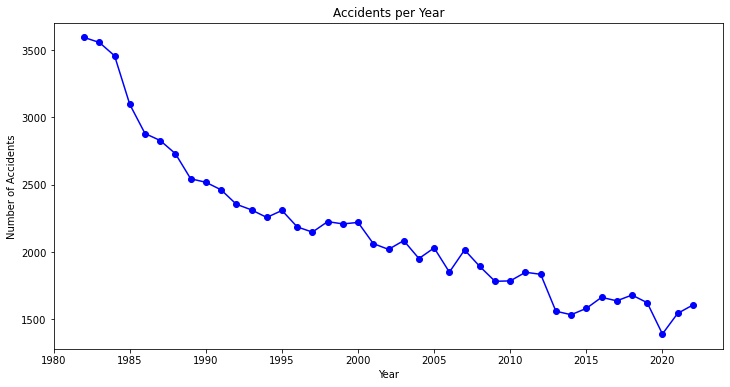

In [30]:
accidents_per_year = df["Event.Year"].value_counts().sort_index()

plt.figure(figsize=(12,6))
plt.plot(accidents_per_year.index, accidents_per_year.values, marker="o", color="blue")
plt.title("Accidents per Year")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.show()

Observation: The number of accidents shows a general downward trend over time, with noticeable spikes in certain years.

Insight: The dataset suggests aviation accidents have declined overall, which may reflect improvements in regulations, technology, and safety practices. The spikes indicate years where clusters of accidents occurred.

This second visualization shows us the fatal vs non fatal accidents trend over time

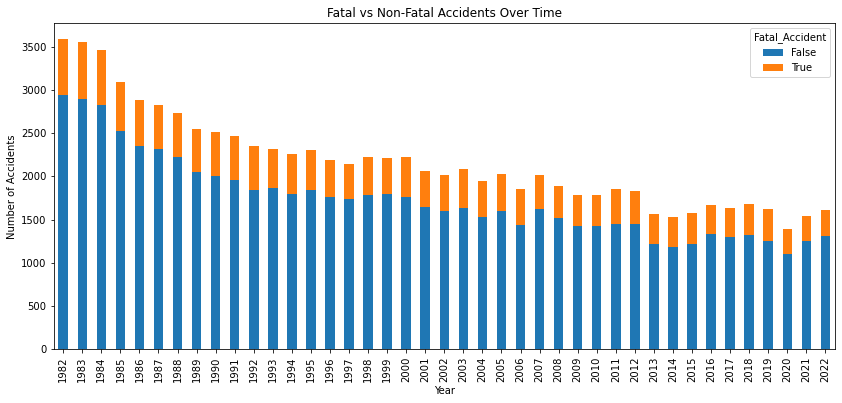

In [33]:
df["Fatal_Accident"] = df["Total.Fatal.Injuries"] > 0
fatal_trend = df.groupby(["Event.Year", "Fatal_Accident"]).size().unstack().fillna(0)

fatal_trend.plot(kind="bar", stacked=True, figsize=(14,6))
plt.title("Fatal vs Non-Fatal Accidents Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.show()

Observation: Non-fatal accidents consistently outnumber fatal ones, and the gap has widened in recent decades.

Insight: The dataset shows that survivability in accidents has improved. More accidents result in no or fewer fatalities, suggesting that safety measures and response systems have become more effective.

This  third visualization shows the accidents that have occured to specific aircraft categories

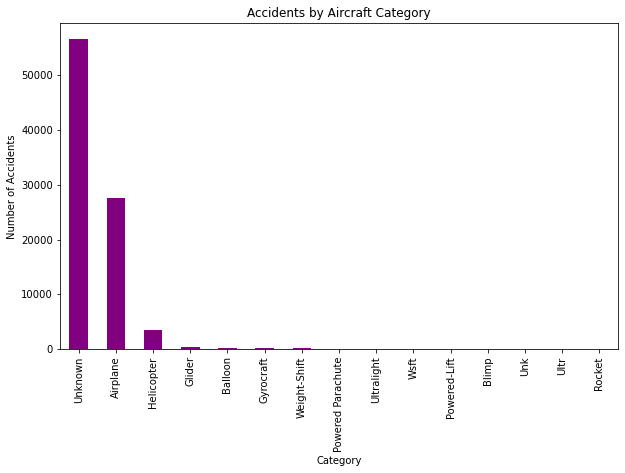

In [41]:
df["Aircraft.Category"].value_counts().plot(kind="bar", color="purple", figsize=(10,6))
plt.title("Accidents by Aircraft Category")
plt.xlabel("Category")
plt.ylabel("Number of Accidents")
plt.show()

Observation: General aviation aircraft (small planes) make up the majority of accidents, while commercial airliners appear far less often.

Insight: Most records in the dataset involve smaller, privately operated aircraft. This highlights that accident risks captured here are concentrated in general aviation.

This forth graph shows us the top 20 models that have had the most accidents

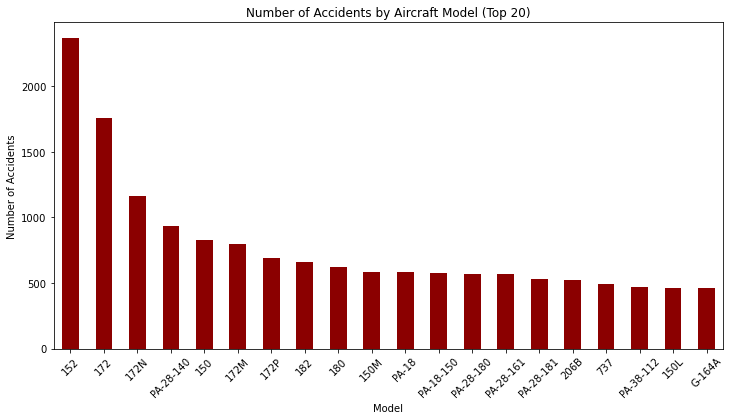

In [55]:
# Count number of accidents by model
accidents_by_model = df["Model"].value_counts().head(20)

accidents_by_model.plot(kind="bar", color="darkred", figsize=(12,6))
plt.title("Number of Accidents by Aircraft Model (Top 20)")
plt.xlabel("Model")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.show()

Observation: Certain models (such as Cessna 172 and 152) appear most frequently in accident records.

Insight: These models occur often in the dataset, indicating their strong presence in recorded accidents. However, this reflects frequency in the data, not necessarily that these models are less safe overall.

This fifth graph shows the top 20 models that have had the most injuries induced

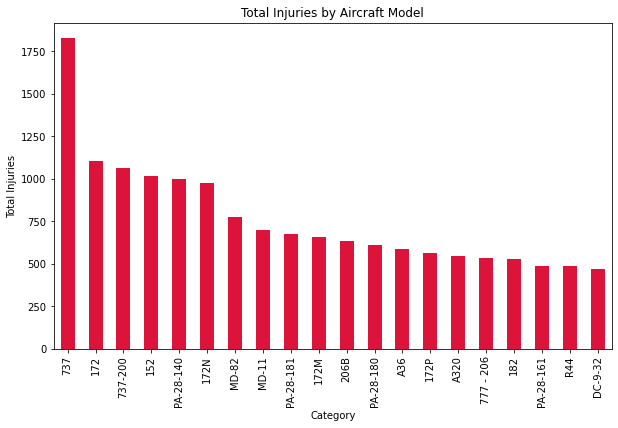

In [69]:
injuries_by_category = df.groupby("Model")["Total.Injuries"].sum().sort_values(ascending=False).head(20)

injuries_by_category.plot(kind="bar", color="crimson", figsize=(10,6))
plt.title("Total Injuries by Aircraft Model")
plt.xlabel("Category")
plt.ylabel("Total Injuries")
plt.show()

Observation: The same models that dominate accident counts also account for the highest total injuries.

Insight: This reinforces that these models appear frequently in accident records. The injury numbers reflect outcomes in recorded accidents, not necessarily higher risk per operation.

This sixth graph shows us the top ten aircraft makes that have had the most injuries

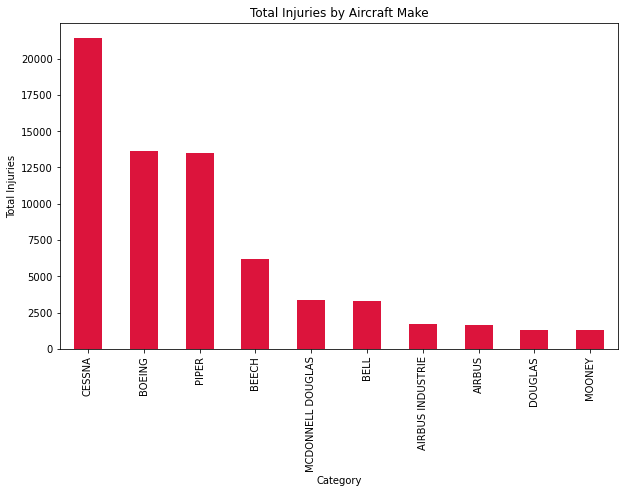

In [71]:
injuries_by_category = df.groupby("Make")["Total.Injuries"].sum().sort_values(ascending=False).head(10)

injuries_by_category.plot(kind="bar", color="crimson", figsize=(10,6))
plt.title("Total Injuries by Aircraft Make")
plt.xlabel("Category")
plt.ylabel("Total Injuries")
plt.show()

Observation: Cessna, Piper, and Beechcraft account for the most injuries in the dataset.

Insight: These manufacturers dominate general aviation accident records. The injury totals reflect their prominence in the dataset, not a conclusion about relative safety.

This seventh visualization shows the top ten makes that have had the most number of accidents occured to them

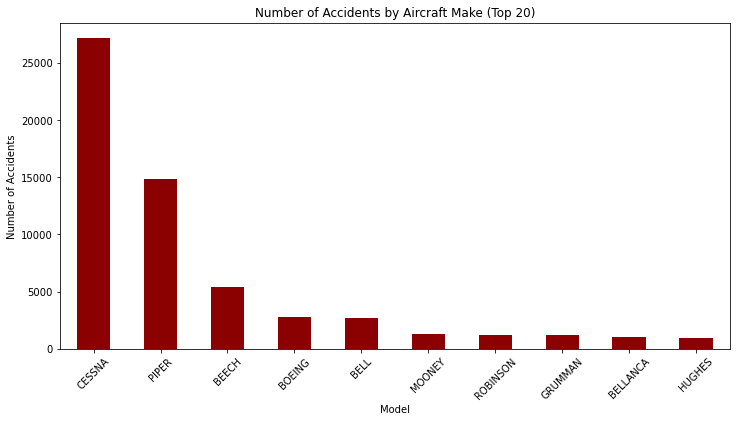

In [73]:
# Count number of accidents by model
accidents_by_model = df["Make"].value_counts().head(10)

accidents_by_model.plot(kind="bar", color="darkred", figsize=(12,6))
plt.title("Number of Accidents by Aircraft Make (Top 20)")
plt.xlabel("Model")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.show()

Observation: The same makes (Cessna, Piper, Beechcraft) also account for the highest number of accidents.

Insight: These manufacturers appear most often in accident records. Boeing and Airbus appear far less frequently, but this should not be interpreted as relative safety since operational volume is unknown.

This eighth graph shows us the top ten models that have the highest fatility rate

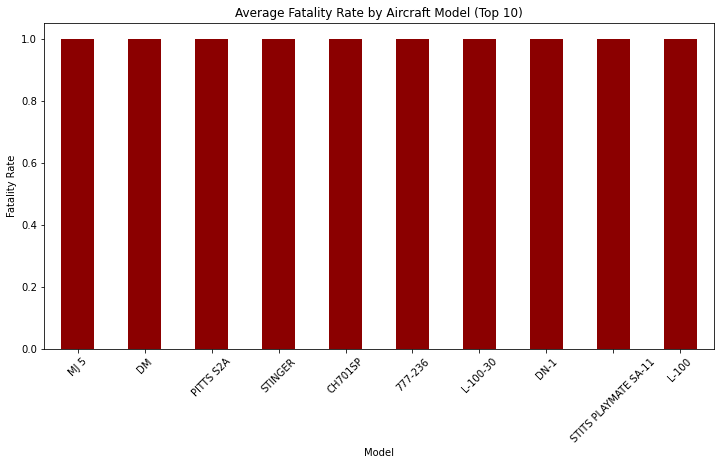

In [76]:
fatality_by_model = df.groupby("Model")["Fatality.Rate"].mean().sort_values(ascending=False).head(10)

fatality_by_model.plot(kind="bar", color="darkred", figsize=(12,6))
plt.title("Average Fatality Rate by Aircraft Model (Top 10)")
plt.xlabel("Model")
plt.ylabel("Fatality Rate")
plt.xticks(rotation=45)
plt.show()

Observation: Smaller aircraft and older models dominate the top 10 fatality rates

Insight: The dataset suggests that certain smaller aircraft tend to have more severe outcomes when accidents occur. This points to differences in survivability across categories, but without exposure data, it cannot be taken as an absolute safety ranking.

This final visualization shows us th number of accidents that have occured across different engine types

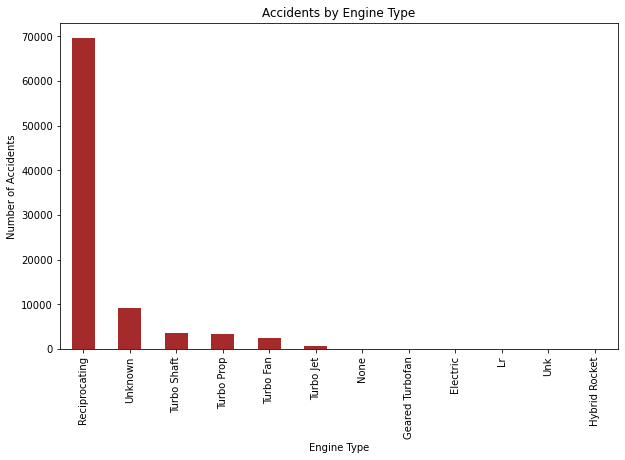

In [77]:
df["Engine.Type"].value_counts().plot(kind="bar", color="brown", figsize=(10,6))
plt.title("Accidents by Engine Type")
plt.xlabel("Engine Type")
plt.ylabel("Number of Accidents")
plt.show()

Observation: Piston-engine aircraft appear most frequently in accident records, followed by turboprops, while jet-engine aircraft appear less often.

Insight: The dataset shows piston aircraft dominate accident counts, likely reflecting their prevalence in general aviation. However, without knowing how many are in operation, we can only conclude that they are most common in recorded accidents, not necessarily the least safe.